#  NLP Toolkits and Preprocessing Exercises and solution

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


## Question 1 ##

* Determine how many reviews there are in total.
* Determine the percent of 1, 2, 3, 4 and 5 star reviews.
* Determine the distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

### Question 1 Solution.

In [3]:
#1a) Number of reviews
num = len(data['reviews'])
print(f'There are {num} reviews')

There are 913 reviews


In [4]:
# 1b) Percentage of the star reviews
data.stars.value_counts(normalize= True) * 100

5    68.346112
4    23.767798
3     6.133625
2     1.314348
1     0.438116
Name: stars, dtype: float64

In [5]:
# 1c) distribution of characters

data['character_ length'] = data['reviews'].apply(len)

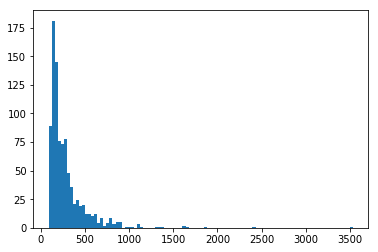

<Figure size 1800x1800 with 0 Axes>

In [6]:
plt.hist(data['character_ length'], bins = 100)
plt.figure(figsize = (25,25))
#plt.grid(color='w', linestyle='-', linewidth=2)
plt.show()

## Question 2 ##

* Apply the following preprocessing steps:

     1. Remove all words that contain numbers
     2. Make all the text lowercase
     3. Remove punctuation
     4. Tokenize the reviews into words
     
 
     
     
* Find the most common words.
* Determine the word length distribution over the entire corpus.

### Question 2 Solution.

In [7]:
# 2a1) Removing all the  words that contain numbers
import re
clean_text = []
for i in data['reviews']:
    hold = re.sub('\w*\d\w*', ' ', i)
    clean_text.append(hold)
data['clean_text'] = clean_text
data.head(47)
# The 45th row shows that numbers has been removed.

,user_id,stars,reviews,character_ length,clean_text
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...,135,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...,1316,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...,261,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...,530,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...,169,My kids loved these. I was very pleased to giv...
5,A2U5TAIAQ675BL,5,I really enjoyed these individually wrapped bi...,232,I really enjoyed these individually wrapped bi...
6,A1R4PIBZBD3NZ0,4,I was surprised at how soft the cookie was. I ...,166,I was surprised at how soft the cookie was. I ...
7,A1ECQ8LJMXG4WI,5,Filled with oats and raisins you'll love this ...,142,Filled with oats and raisins you'll love this ...
8,A3MSG4E5MLI1XP,5,"I was recently given a complimentary ""vox box""...",900,"I was recently given a complimentary ""vox box""..."
9,A3BUDUV9GORLWH,5,the best and freshest cookie that comes in a p...,99,the best and freshest cookie that comes in a p...


In [8]:
# 2a2) Converting the reviews to lower cases
lower_clean_text =[]
for i in data['clean_text']:
    hold = i.lower()
    lower_clean_text.append(hold)

data['lower_clean_text'] =  lower_clean_text
data.head()

,user_id,stars,reviews,character_ length,clean_text,lower_clean_text
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...,135,I love these cookies! Not only are they healt...,i love these cookies! not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...,1316,Quaker Soft Baked Oatmeal Cookies with raisins...,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...,261,I am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...,530,I participated in a product review that includ...,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...,169,My kids loved these. I was very pleased to giv...,my kids loved these. i was very pleased to giv...


In [9]:
# Personally, I do not see the use for the user_id so, i removed it.
data.drop(['user_id'], axis = 1, inplace = True)
#data.head()

In [10]:
# 2a3)Removing Punctuations
import string
no_punctuation = []
for i in data['lower_clean_text']:
    hold = re.sub('[%s]'%re.escape(string.punctuation), ' ',str(i))
    no_punctuation.append(hold)
    
data['no_punctuation'] = no_punctuation
data.head(10)

,stars,reviews,character_ length,clean_text,lower_clean_text,no_punctuation
0,5,I love these cookies! Not only are they healt...,135,I love these cookies! Not only are they healt...,i love these cookies! not only are they healt...,i love these cookies not only are they healt...
1,5,Quaker Soft Baked Oatmeal Cookies with raisins...,1316,Quaker Soft Baked Oatmeal Cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...
2,5,I am usually not a huge fan of oatmeal cookies...,261,I am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...
3,5,I participated in a product review that includ...,530,I participated in a product review that includ...,i participated in a product review that includ...,i participated in a product review that includ...
4,5,My kids loved these. I was very pleased to giv...,169,My kids loved these. I was very pleased to giv...,my kids loved these. i was very pleased to giv...,my kids loved these i was very pleased to giv...
5,5,I really enjoyed these individually wrapped bi...,232,I really enjoyed these individually wrapped bi...,i really enjoyed these individually wrapped bi...,i really enjoyed these individually wrapped bi...
6,4,I was surprised at how soft the cookie was. I ...,166,I was surprised at how soft the cookie was. I ...,i was surprised at how soft the cookie was. i ...,i was surprised at how soft the cookie was i ...
7,5,Filled with oats and raisins you'll love this ...,142,Filled with oats and raisins you'll love this ...,filled with oats and raisins you'll love this ...,filled with oats and raisins you ll love this ...
8,5,"I was recently given a complimentary ""vox box""...",900,"I was recently given a complimentary ""vox box""...","i was recently given a complimentary ""vox box""...",i was recently given a complimentary vox box ...
9,5,the best and freshest cookie that comes in a p...,99,the best and freshest cookie that comes in a p...,the best and freshest cookie that comes in a p...,the best and freshest cookie that comes in a p...


In [11]:
# 2a4) Tokenizing the words
from nltk.tokenize import  word_tokenize
tokenize= []
for i in data['no_punctuation']:
    hold = word_tokenize(i)
    tokenize.append(hold)
    
data['tokenized_words'] = tokenize
data.head()

,stars,reviews,character_ length,clean_text,lower_clean_text,no_punctuation,tokenized_words
0,5,I love these cookies! Not only are they healt...,135,I love these cookies! Not only are they healt...,i love these cookies! not only are they healt...,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they..."
1,5,Quaker Soft Baked Oatmeal Cookies with raisins...,1316,Quaker Soft Baked Oatmeal Cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ..."
2,5,I am usually not a huge fan of oatmeal cookies...,261,I am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea..."
3,5,I participated in a product review that includ...,530,I participated in a product review that includ...,i participated in a product review that includ...,i participated in a product review that includ...,"[i, participated, in, a, product, review, that..."
4,5,My kids loved these. I was very pleased to giv...,169,My kids loved these. I was very pleased to giv...,my kids loved these. i was very pleased to giv...,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased..."


In [12]:
#word_list = sum(data.tokenized_words.tolist(),[]) this puts all the tokenized words in a list.

In [13]:
# 2b 1) Finding the most common words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
bag_of_words = cv.fit_transform(data['no_punctuation'])
common_words = pd.DataFrame(bag_of_words.toarray(), columns=cv.get_feature_names()).sum()
common_words.head()

abhorrent     1
able         21
about        79
above         1
absolute      1
dtype: int64

In [14]:
# 2b 2)A better way to find the most common words
def count_the_most_occuring_words(corpus, n):
    cv = CountVectorizer()
    bag_of_words = cv.fit_transform(corpus)
    sum_of_words = bag_of_words.sum(axis= 0)
    words_freq = [(word, sum_of_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [15]:
common_words = count_the_most_occuring_words(data['no_punctuation'], 5)
for word, freq in common_words:
    print(word, freq)

and 1755
the 1652
it 1028
to 991
my 845


## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform parts of speech tagging
     * Perform stemming
     * Optional: Perform lemmatization

  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

In [16]:
#3a) removing stop words
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

stop_fn = lambda x: [word for word in x if word not in stopwords]
data['removed_stopwords'] = data['tokenized_words'].apply(stop_fn)
data.head()

,stars,reviews,character_ length,clean_text,lower_clean_text,no_punctuation,tokenized_words,removed_stopwords
0,5,I love these cookies! Not only are they healt...,135,I love these cookies! Not only are they healt...,i love these cookies! not only are they healt...,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d..."
1,5,Quaker Soft Baked Oatmeal Cookies with raisins...,1316,Quaker Soft Baked Oatmeal Cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin..."
2,5,I am usually not a huge fan of oatmeal cookies...,261,I am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal..."
3,5,I participated in a product review that includ...,530,I participated in a product review that includ...,i participated in a product review that includ...,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp..."
4,5,My kids loved these. I was very pleased to giv...,169,My kids loved these. I was very pleased to giv...,my kids loved these. i was very pleased to giv...,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ..."


In [17]:
# 3 d) Lemmanizing the words
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lem = WordNetLemmatizer()

lemmanizer = lambda x:[lem.lemmatize(i) for i in x]

data['lemmanized_words'] =  data['removed_stopwords'].apply(lemmanizer)
data.head()

data.head()



,stars,reviews,character_ length,clean_text,lower_clean_text,no_punctuation,tokenized_words,removed_stopwords,lemmanized_words
0,5,I love these cookies! Not only are they healt...,135,I love these cookies! Not only are they healt...,i love these cookies! not only are they healt...,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[love, cooky, healthy, taste, great, soft, def..."
1,5,Quaker Soft Baked Oatmeal Cookies with raisins...,1316,Quaker Soft Baked Oatmeal Cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[quaker, soft, baked, oatmeal, cooky, raisin, ..."
2,5,I am usually not a huge fan of oatmeal cookies...,261,I am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[usually, huge, fan, oatmeal, cooky, literally..."
3,5,I participated in a product review that includ...,530,I participated in a product review that includ...,i participated in a product review that includ...,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[participated, product, review, included, samp..."
4,5,My kids loved these. I was very pleased to giv...,169,My kids loved these. I was very pleased to giv...,my kids loved these. i was very pleased to giv...,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[kid, loved, pleased, give, kid, quick, go, he..."


In [18]:
# 3 c) stemming the words
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stemmed = lambda x:[ ps.stem(i) for i in x]

    
data['stemmed_words'] =  data['removed_stopwords'].apply(stemmed)
data.head()



,stars,reviews,character_ length,clean_text,lower_clean_text,no_punctuation,tokenized_words,removed_stopwords,lemmanized_words,stemmed_words
0,5,I love these cookies! Not only are they healt...,135,I love these cookies! Not only are they healt...,i love these cookies! not only are they healt...,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[love, cooky, healthy, taste, great, soft, def...","[love, cooki, healthi, tast, great, soft, defi..."
1,5,Quaker Soft Baked Oatmeal Cookies with raisins...,1316,Quaker Soft Baked Oatmeal Cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[quaker, soft, baked, oatmeal, cooky, raisin, ...","[quaker, soft, bake, oatmeal, cooki, raisin, d..."
2,5,I am usually not a huge fan of oatmeal cookies...,261,I am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[usually, huge, fan, oatmeal, cooky, literally...","[usual, huge, fan, oatmeal, cooki, liter, melt..."
3,5,I participated in a product review that includ...,530,I participated in a product review that includ...,i participated in a product review that includ...,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[participated, product, review, included, samp...","[particip, product, review, includ, sampl, hre..."
4,5,My kids loved these. I was very pleased to giv...,169,My kids loved these. I was very pleased to giv...,my kids loved these. i was very pleased to giv...,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[kid, loved, pleased, give, kid, quick, go, he...","[kid, love, pleas, give, kid, quick, go, healt..."


In [19]:
# This puts all the stemmed words in a list.
word_list = sum(data.stemmed_words.tolist(),[]) 
word_list

['love',
 'cooki',
 'healthi',
 'tast',
 'great',
 'soft',
 'definit',
 'add',
 'groceri',
 'list',
 'quaker',
 'soft',
 'bake',
 'oatmeal',
 'cooki',
 'raisin',
 'delici',
 'treat',
 'great',
 'anytim',
 'day',
 'exampl',
 'br',
 'br',
 'breakfast',
 'one',
 'larg',
 'banana',
 'cup',
 'coffe',
 'felt',
 'rel',
 'healthi',
 'start',
 'day',
 'br',
 'br',
 'next',
 'day',
 'lunch',
 'follow',
 'tuna',
 'sandwich',
 'one',
 'glass',
 'milk',
 'satisfi',
 'enough',
 'need',
 'snack',
 'dinner',
 'br',
 'br',
 'follow',
 'night',
 'dinner',
 'one',
 'remaind',
 'glass',
 'wine',
 'delici',
 'feel',
 'need',
 'snack',
 'later',
 'even',
 'br',
 'br',
 'cooki',
 'individu',
 'packag',
 'textur',
 'soft',
 'moist',
 'right',
 'amount',
 'sweet',
 'natur',
 'flavor',
 'use',
 'make',
 'cinnamon',
 'spice',
 'flavor',
 'give',
 'cooki',
 'real',
 'old',
 'fashion',
 'homemad',
 'tast',
 'br',
 'br',
 'nutrit',
 'cooki',
 'calori',
 'satur',
 'fat',
 'mg',
 'sodium',
 'sugar',
 'also',
 'protei

In [20]:
# 3b) part of speech tagging.

# nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

tagged_words = pos_tag(word_list)
tagged_words

[('love', 'VB'),
 ('cooki', 'NN'),
 ('healthi', 'NN'),
 ('tast', 'NN'),
 ('great', 'JJ'),
 ('soft', 'JJ'),
 ('definit', 'NN'),
 ('add', 'VB'),
 ('groceri', 'JJ'),
 ('list', 'NN'),
 ('quaker', 'NN'),
 ('soft', 'JJ'),
 ('bake', 'NN'),
 ('oatmeal', 'NN'),
 ('cooki', 'NN'),
 ('raisin', 'NN'),
 ('delici', 'NN'),
 ('treat', 'NN'),
 ('great', 'JJ'),
 ('anytim', 'JJ'),
 ('day', 'NN'),
 ('exampl', 'VB'),
 ('br', 'NN'),
 ('br', 'IN'),
 ('breakfast', 'NN'),
 ('one', 'CD'),
 ('larg', 'NN'),
 ('banana', 'NN'),
 ('cup', 'NN'),
 ('coffe', 'NN'),
 ('felt', 'VBD'),
 ('rel', 'JJ'),
 ('healthi', 'JJ'),
 ('start', 'NN'),
 ('day', 'NN'),
 ('br', 'VBD'),
 ('br', 'JJ'),
 ('next', 'JJ'),
 ('day', 'NN'),
 ('lunch', 'NN'),
 ('follow', 'VBP'),
 ('tuna', 'NN'),
 ('sandwich', 'NN'),
 ('one', 'CD'),
 ('glass', 'NN'),
 ('milk', 'NN'),
 ('satisfi', 'VBN'),
 ('enough', 'RB'),
 ('need', 'JJ'),
 ('snack', 'NN'),
 ('dinner', 'NN'),
 ('br', 'NN'),
 ('br', 'NN'),
 ('follow', 'VB'),
 ('night', 'NN'),
 ('dinner', 'NN'),
 ('o

## Question 4 ##

* After going through these preprocessing steps, what are the most common words now? Do they make more sense?

In [21]:
def count_the_most_occuring_words(corpus, n):
    cv = CountVectorizer()
    bag_of_words = cv.fit_transform(corpus)
    sum_of_words = bag_of_words.sum(axis= 0)
    words_freq = [(word, sum_of_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [22]:
common_words = count_the_most_occuring_words(word_list, 5)
for word, freq in common_words:
    print(word, freq)

cooki 1686
soft 713
love 559
oatmeal 482
tast 416
